In [11]:
import pandas as pd
from glob import glob
from lets_plot import *

In [12]:
ls = []
for path in sorted(glob('../mpmat/mpmat_all_*_after_rmdup.mpmat.gz')):
    df = pd.read_csv(path, sep='\t', header=None)
    C = int(path.split('_C')[-1].split('_after')[0].split('M')[0])
    M = int(path.split('_C')[-1].split('_after')[0].split('M')[1].split('R')[0])
    R = int(path.split('_C')[-1].split('_after')[0].split('M')[1].split('R')[1])
    point = df.shape[0]
    ls.append([C, M, R, point])
ls

[[10, 4, 1, 1355368],
 [10, 4, 2, 413012],
 [10, 4, 3, 148420],
 [10, 5, 1, 541531],
 [10, 5, 2, 181161],
 [10, 5, 3, 71283],
 [10, 6, 1, 273766],
 [10, 6, 2, 91720],
 [10, 6, 3, 39599],
 [10, 7, 1, 162275],
 [10, 7, 2, 52766],
 [10, 7, 3, 24900],
 [6, 4, 1, 1534989],
 [6, 4, 2, 470673],
 [6, 4, 3, 163413],
 [6, 5, 1, 589884],
 [6, 5, 2, 194817],
 [6, 5, 3, 74755],
 [6, 6, 1, 292820],
 [6, 6, 2, 94912],
 [6, 6, 3, 40317],
 [6, 7, 1, 170611],
 [6, 7, 2, 53507],
 [6, 7, 3, 25026],
 [8, 4, 1, 1480115],
 [8, 4, 2, 453196],
 [8, 4, 3, 158921],
 [8, 5, 1, 574541],
 [8, 5, 2, 191431],
 [8, 5, 3, 73902],
 [8, 6, 1, 285817],
 [8, 6, 2, 94220],
 [8, 6, 3, 40183],
 [8, 7, 1, 168285],
 [8, 7, 2, 53377],
 [8, 7, 3, 25005]]

In [13]:
df = pd.DataFrame(ls, columns=['C', 'M', 'R', 'Point'])
df

,C,M,R,Point
0,10,4,1,1355368
1,10,4,2,413012
2,10,4,3,148420
3,10,5,1,541531
4,10,5,2,181161
5,10,5,3,71283
6,10,6,1,273766
7,10,6,2,91720
8,10,6,3,39599
9,10,7,1,162275


In [14]:
LetsPlot.setup_html()

In [15]:
# # C
# C = ['6', '8', '10']  # SITECOVERNUM
# #                         Site-cutoff, total cover reads number, default=5 
# # M
# M = ['4', '5', '6', '7']  # SITEMUTNUM
# #                         Site-cutoff, mutation reads number, default=1
# # R
# R = ['1', '2', '3']  # REGIONMUTNUM
# #                         Region at least has this number of sites which carry mutation
# #                         info. Default=2


(
    ggplot(data=df, mapping=aes(x='C', y='M', fill='Point')) +
        geom_raster() +
        scale_fill_gradient(low='white', high='red') +
        geom_text(aes(label='Point')) +
        facet_wrap('R', ncol=3) + 
        xlab(label='C/SITE_COVER_NUM') +
        ylab(label='M/SITE_MUT_NUM') + 
        ggtitle(label='select: C6M6R2', subtitle='R/REGION_PASS_NUM') + 
        theme_light()
        
)

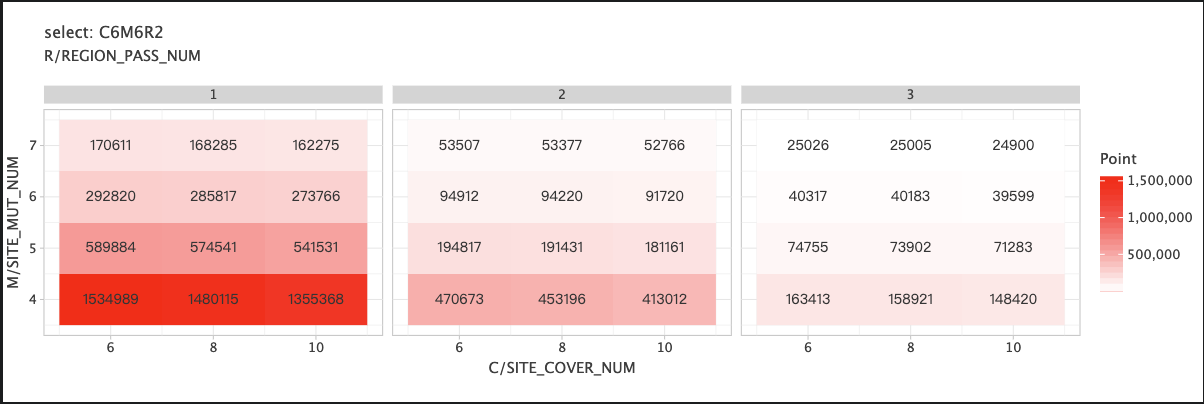

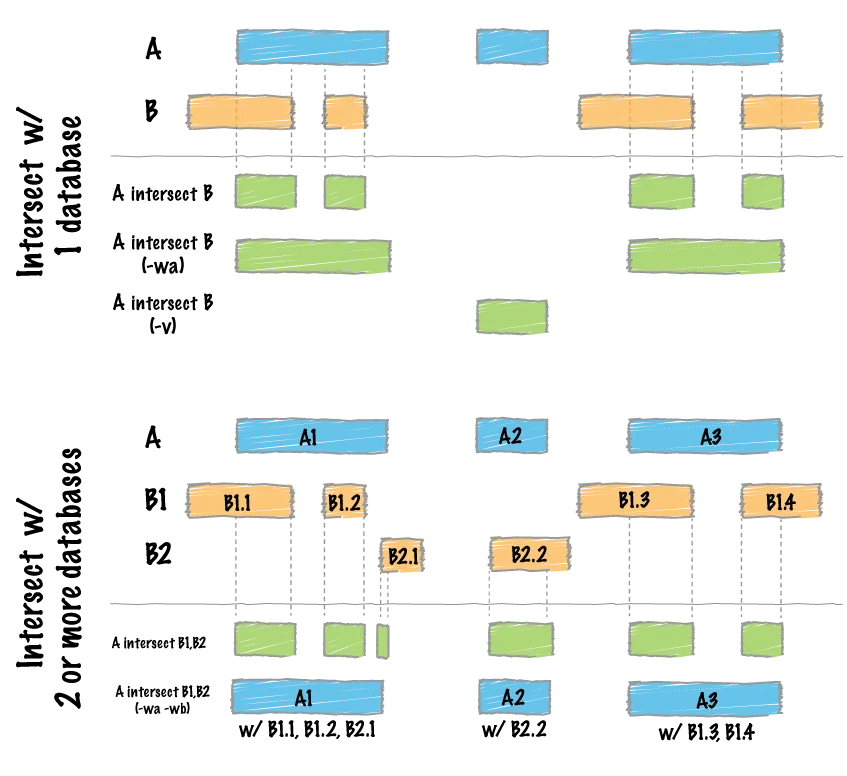

# bash script
```
# 查看有多少可能的off-target位点
zcat mpmat_all_C6M6R2_after_rmdup.mpmat.gz | wc -l

# 94912



# 去除Nature2022中报告的off-target（后续重新加回来，这里去除是为了和Nature2022的off-target位点统一坐标）
bedtools intersect -a mpmat_all_C6M6R2_after_rmdup.mpmat.gz -b ../tables/20220304-DdCBE-FinallistV4_merge.NoHeader.fix-col13.mpmat -v | wc -l
# 94223
bedtools intersect -a mpmat_all_C6M6R2_after_rmdup.mpmat.gz -b ../tables/20220304-DdCBE-FinallistV4_merge.NoHeader.fix-col13.mpmat -v > mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap.mpmat
# 剩下94223个点

wc -l mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap.mpmat
94223 mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap.mpmat
# 剩下94223个点


# 去除在以往对HEK293T细胞系进行分析时被确定为是SNV的位点
bedtools intersect -a mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap.mpmat -b ~/1.database/db_genomes/cell_line_mutations/293T/293T_BE_INPUT_VCF/293T_DddA11_FalsePositive_off-target-list.bed -v | wc -l  
# 94136
# 剩下94136个点
bedtools intersect -a mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap.mpmat -b ~/1.database/db_genomes/cell_line_mutations/293T/293T_BE_INPUT_VCF/293T_DddA11_FalsePositive_off-target-list.bed -v >  mpmat_all_C6M6R2_after_rmdup_final_rm_oldoverlap_rmblacklist.mpmat


# 检查
wc -l mpmat_all_C6M6R2_after_rmdup_final_rm_oldoverlap_rmblacklist.mpmat      
# 94136 mpmat_all_C6M6R2_after_rmdup_final_rm_oldoverlap_rmblacklist.mpmat

# 重新将Nature2022报告的脱靶位点加入要做泊松检验的list中，得到101017个点
# cat mpmat_all_C6M6R2_after_rmdup_final_rm_oldoverlap_rmblacklist.mpmat ../tables/20220304-DdCBE-FinallistV4_merge.NoHeader.mpmat > mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex.mpmat

wc -l mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex.mpmat               
# 101017 mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex.mpmat


# 再次检查
bedtools intersect -a mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex.mpmat -b mpmat_all_C6M6R2_after_rmdup_final_rm_oldoverlap_rmblacklist.mpmat -v | wc -l
# 6881
wc -l ../tables/20220304-DdCBE-FinallistV4_merge.NoHeader.fix-col13.mpmat 
# 6881 ../tables/20220304-DdCBE-FinallistV4_merge.NoHeader.fix-col13.mpmat


# 再次检查
cat mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex.mpmat | uniq | wc -l

101017

# 再次检查
bedtools sort -i mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex.mpmat -faidx ~/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa.fai | uniq | wc -l

101017

# 按照基因组染色体顺序排序去重（其实没有重复），得到101017个等待泊松检验的位点
bedtools sort -i mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex.mpmat -faidx ~/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa.fai | uniq > mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort.mpmat

wc -l mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort.mpmat 
101017 mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort.mpmat


# 使用写好的脚本对靠得太近的可能得脱靶位点merge在一起，只报告一个位点
python ../snakepipes_detect-seq/program/detect_seq/remove-overlap-mpmat.py -i mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort.mpmat -o mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort_rmdup2.mpmat


Total count: 101017 
Final out count: 100807


# 查看Nature2022中的位点有没有被merge进去，发现merge了两个，（不影响暂时不管了）
bedtools intersect -a mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort_rmdup2.mpmat -b ../tables/20220304-DdCBE-FinallistV4_merge.NoHeader.mpmat| wc -l
6879
# 少了两个


bedtools sort -i mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort_rmdup2.mpmat -faidx ~/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa.fai | uniq | wc -l
100807


bedtools sort -i mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort_rmdup2.mpmat -faidx ~/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa.fai | uniq > mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort2_rmdup2.mpmat


# 最终使用的list，用来进行第六步，泊松检验，并且最终报告脱靶位点
# mpmat that I used
mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort2_rmdup2.mpmat
```

In [12]:
# mpmat_all_C6M6R2_after_rmdup_rm_oldoverlap_rmblacklist_add_NatIndex_sort2_rmdup2.mpmat